### Project overview:
The objective of this project is to analyze driving behaviors of Pakistan and identify any differences between genders. The project aims to understand how gender may influence various driving outcomes, such as accident rates, speeding violations, and adherence to traffic rules. By exploring these patterns, we can gain insights into potential gender-based disparities in driving behaviors.

### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import warnings
warnings.simplefilter("ignore")

### Loading Dataset

The dataset used for this analysis contains information on a sample of drivers, including their demographic characteristics, driving history, and recorded incidents. The dataset includes variables such as age, gender, number of accidents, speeding violations, and other relevant driving-related attributes.

In [3]:
df = pd.read_csv(r"C:\Users\razam\Downloads\Pak Data.csv")

### Statistical Insights

In [4]:
df.head()

,Driver ID,Name,Age,Gender,Years of Driving Experience,Location,Occupation,Marital Status,Socioeconomic Status,Driver's License,...,Vehicle Type,Vehicle Make,Vehicle Model,Vehicle Year,Road Type,Speed Limit,Traffic Signs Present,Road Conditions.1,Distance Traveled (km),Seatbelt Usage
0,1,Ali Hassan,35,Male,15,Lahore,Engineer,Married,Middle Class,Yes,...,Sedan,Toyota,Corolla,2018,Urban,50 km/h,Yes,No Construction Zone,500.0,Yes
1,2,Fatima Khan,42,Female,20,Karachi,Doctor,Married,Upper Class,Yes,...,Sedan,Honda,Civic,2020,Urban,60 km/h,Yes,No Construction Zone,1200.0,Yes
2,3,Usman Ahmed,28,Male,5,Islamabad,Teacher,Single,Lower Class,Yes,...,Hatchback,Suzuki,Mehran,2015,Suburban,40 km/h,Yes,Construction Zone Ahead,800.0,No
3,4,Asad Khan,55,Male,30,Peshawar,Business Owner,Married,Upper Middle Class,Yes,...,Sedan,Honda,Accord,2019,Highway,100 km/h,Yes,No Construction Zone,1500.0,Yes
4,5,Ayesha Malik,31,Female,10,Lahore,Lawyer,Divorced,Upper Class,Yes,...,Minivan,Changhan,Star,2022,Urban,60 km/h,Yes,No Construction Zone,800.0,Yes


In [5]:
df.dtypes

Driver ID                         int64
Name                             object
Age                               int64
Gender                           object
Years of Driving Experience       int64
Location                         object
Occupation                       object
Marital Status                   object
Socioeconomic Status             object
Driver's License                 object
Accident Type                    object
Accident Location                object
Date                             object
Time                             object
Weather Conditions               object
Road Conditions                  object
Accident Severity                object
Average Speed                     int64
Traffic Signal Violations         int64
Distracted Driving Frequency     object
Traffic Violations                int64
Training Programs                object
Training Hours                    int64
Certifications                   object
Vehicle Type                     object


In [6]:
df.describe()

,Driver ID,Age,Years of Driving Experience,Average Speed,Traffic Signal Violations,Traffic Violations,Training Hours,Vehicle Year,Distance Traveled (km)
count,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1199.000000
mean,600.500000,36.447500,11.879167,57.30000,0.562500,2.246667,12.004167,2003.093333,481.557965
std,346.554469,7.671133,6.447548,5.12984,0.575647,1.244500,7.232294,52.990924,282.044384
min,1.000000,22.000000,2.000000,40.00000,0.000000,1.000000,0.000000,202.000000,18.000000
25%,300.750000,32.000000,8.000000,55.00000,0.000000,2.000000,10.000000,1998.000000,400.000000
50%,600.500000,35.000000,10.000000,55.00000,1.000000,2.000000,14.000000,1999.000000,500.000000
75%,900.250000,39.000000,15.000000,60.00000,1.000000,2.000000,15.000000,2019.000000,700.000000
max,1200.000000,63.000000,33.000000,75.00000,2.000000,7.000000,40.000000,2023.000000,1500.000000


### Check Missing Values

In [7]:
df.isnull().sum()


Driver ID                       0
Name                            0
Age                             0
Gender                          0
Years of Driving Experience     0
Location                        0
Occupation                      0
Marital Status                  0
Socioeconomic Status            0
Driver's License                0
Accident Type                   0
Accident Location               0
Date                            0
Time                            0
Weather Conditions              0
Road Conditions                 0
Accident Severity               0
Average Speed                   0
Traffic Signal Violations       0
Distracted Driving Frequency    0
Traffic Violations              0
Training Programs               0
Training Hours                  0
Certifications                  0
Vehicle Type                    0
Vehicle Make                    0
Vehicle Model                   0
Vehicle Year                    0
Road Type                       1
Speed Limit   

In [8]:
# Option 1: Imputation: Replace missing values with mean of the column
df_imputed = df.fillna(df.mean())

In [9]:
# Option 2: Removal: Remove rows with any missing values
df_removed_rows = df.dropna()

In [10]:
# Remove columns with any missing values
df_removed_cols = df.dropna(axis=1)

In [11]:
# Print the resulting DataFrames
df_imputed.head()

,Driver ID,Name,Age,Gender,Years of Driving Experience,Location,Occupation,Marital Status,Socioeconomic Status,Driver's License,...,Vehicle Type,Vehicle Make,Vehicle Model,Vehicle Year,Road Type,Speed Limit,Traffic Signs Present,Road Conditions.1,Distance Traveled (km),Seatbelt Usage
0,1,Ali Hassan,35,Male,15,Lahore,Engineer,Married,Middle Class,Yes,...,Sedan,Toyota,Corolla,2018,Urban,50 km/h,Yes,No Construction Zone,500.0,Yes
1,2,Fatima Khan,42,Female,20,Karachi,Doctor,Married,Upper Class,Yes,...,Sedan,Honda,Civic,2020,Urban,60 km/h,Yes,No Construction Zone,1200.0,Yes
2,3,Usman Ahmed,28,Male,5,Islamabad,Teacher,Single,Lower Class,Yes,...,Hatchback,Suzuki,Mehran,2015,Suburban,40 km/h,Yes,Construction Zone Ahead,800.0,No
3,4,Asad Khan,55,Male,30,Peshawar,Business Owner,Married,Upper Middle Class,Yes,...,Sedan,Honda,Accord,2019,Highway,100 km/h,Yes,No Construction Zone,1500.0,Yes
4,5,Ayesha Malik,31,Female,10,Lahore,Lawyer,Divorced,Upper Class,Yes,...,Minivan,Changhan,Star,2022,Urban,60 km/h,Yes,No Construction Zone,800.0,Yes


In [12]:
# DataFrame with removed rows
df_removed_rows.head()

,Driver ID,Name,Age,Gender,Years of Driving Experience,Location,Occupation,Marital Status,Socioeconomic Status,Driver's License,...,Vehicle Type,Vehicle Make,Vehicle Model,Vehicle Year,Road Type,Speed Limit,Traffic Signs Present,Road Conditions.1,Distance Traveled (km),Seatbelt Usage
0,1,Ali Hassan,35,Male,15,Lahore,Engineer,Married,Middle Class,Yes,...,Sedan,Toyota,Corolla,2018,Urban,50 km/h,Yes,No Construction Zone,500.0,Yes
1,2,Fatima Khan,42,Female,20,Karachi,Doctor,Married,Upper Class,Yes,...,Sedan,Honda,Civic,2020,Urban,60 km/h,Yes,No Construction Zone,1200.0,Yes
2,3,Usman Ahmed,28,Male,5,Islamabad,Teacher,Single,Lower Class,Yes,...,Hatchback,Suzuki,Mehran,2015,Suburban,40 km/h,Yes,Construction Zone Ahead,800.0,No
3,4,Asad Khan,55,Male,30,Peshawar,Business Owner,Married,Upper Middle Class,Yes,...,Sedan,Honda,Accord,2019,Highway,100 km/h,Yes,No Construction Zone,1500.0,Yes
4,5,Ayesha Malik,31,Female,10,Lahore,Lawyer,Divorced,Upper Class,Yes,...,Minivan,Changhan,Star,2022,Urban,60 km/h,Yes,No Construction Zone,800.0,Yes


In [13]:
# DataFrame with removed columns
df_removed_cols.head()

,Driver ID,Name,Age,Gender,Years of Driving Experience,Location,Occupation,Marital Status,Socioeconomic Status,Driver's License,...,Traffic Signal Violations,Distracted Driving Frequency,Traffic Violations,Training Programs,Training Hours,Certifications,Vehicle Type,Vehicle Make,Vehicle Model,Vehicle Year
0,1,Ali Hassan,35,Male,15,Lahore,Engineer,Married,Middle Class,Yes,...,0,Low,2,Defensive Driving Course,20,Defensive Driving,Sedan,Toyota,Corolla,2018
1,2,Fatima Khan,42,Female,20,Karachi,Doctor,Married,Upper Class,Yes,...,2,Moderate,1,Advanced Driving Course,30,Defensive Driving,Sedan,Honda,Civic,2020
2,3,Usman Ahmed,28,Male,5,Islamabad,Teacher,Single,Lower Class,Yes,...,1,High,3,None,0,None,Hatchback,Suzuki,Mehran,2015
3,4,Asad Khan,55,Male,30,Peshawar,Business Owner,Married,Upper Middle Class,Yes,...,0,Low,4,Defensive Driving Course,40,Defensive Driving,Sedan,Honda,Accord,2019
4,5,Ayesha Malik,31,Female,10,Lahore,Lawyer,Divorced,Upper Class,Yes,...,1,Moderate,2,Defensive Driving Course,25,Defensive Driving,Minivan,Changhan,Star,2022


In [14]:
# Convert data types
df['Years of Driving Experience'] = df['Years of Driving Experience'].astype(float)
df['Occupation'] = df['Occupation'].astype(str)

In [15]:
# Normalize or scale numerical variables
scaler = MinMaxScaler()
df['Years of Driving Experience'] = scaler.fit_transform(df[['Years of Driving Experience']])

In [16]:
# Encode categorical variables
encoder = LabelEncoder()
df['Occupation'] = encoder.fit_transform(df['Occupation'])

In [17]:
# Print the transformed DataFrame
df.head()

,Driver ID,Name,Age,Gender,Years of Driving Experience,Location,Occupation,Marital Status,Socioeconomic Status,Driver's License,...,Vehicle Type,Vehicle Make,Vehicle Model,Vehicle Year,Road Type,Speed Limit,Traffic Signs Present,Road Conditions.1,Distance Traveled (km),Seatbelt Usage
0,1,Ali Hassan,35,Male,0.419355,Lahore,4,Married,Middle Class,Yes,...,Sedan,Toyota,Corolla,2018,Urban,50 km/h,Yes,No Construction Zone,500.0,Yes
1,2,Fatima Khan,42,Female,0.580645,Karachi,3,Married,Upper Class,Yes,...,Sedan,Honda,Civic,2020,Urban,60 km/h,Yes,No Construction Zone,1200.0,Yes
2,3,Usman Ahmed,28,Male,0.096774,Islamabad,6,Single,Lower Class,Yes,...,Hatchback,Suzuki,Mehran,2015,Suburban,40 km/h,Yes,Construction Zone Ahead,800.0,No
3,4,Asad Khan,55,Male,0.903226,Peshawar,1,Married,Upper Middle Class,Yes,...,Sedan,Honda,Accord,2019,Highway,100 km/h,Yes,No Construction Zone,1500.0,Yes
4,5,Ayesha Malik,31,Female,0.258065,Lahore,5,Divorced,Upper Class,Yes,...,Minivan,Changhan,Star,2022,Urban,60 km/h,Yes,No Construction Zone,800.0,Yes


### Removing duplicates

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
# Correcting inconsistent values
df['Occupation'].replace({'4': 'Doctor'}, inplace=True)

In [20]:
# Print the cleaned DataFrame
df.head()

,Driver ID,Name,Age,Gender,Years of Driving Experience,Location,Occupation,Marital Status,Socioeconomic Status,Driver's License,...,Vehicle Type,Vehicle Make,Vehicle Model,Vehicle Year,Road Type,Speed Limit,Traffic Signs Present,Road Conditions.1,Distance Traveled (km),Seatbelt Usage
0,1,Ali Hassan,35,Male,0.419355,Lahore,4,Married,Middle Class,Yes,...,Sedan,Toyota,Corolla,2018,Urban,50 km/h,Yes,No Construction Zone,500.0,Yes
1,2,Fatima Khan,42,Female,0.580645,Karachi,3,Married,Upper Class,Yes,...,Sedan,Honda,Civic,2020,Urban,60 km/h,Yes,No Construction Zone,1200.0,Yes
2,3,Usman Ahmed,28,Male,0.096774,Islamabad,6,Single,Lower Class,Yes,...,Hatchback,Suzuki,Mehran,2015,Suburban,40 km/h,Yes,Construction Zone Ahead,800.0,No
3,4,Asad Khan,55,Male,0.903226,Peshawar,1,Married,Upper Middle Class,Yes,...,Sedan,Honda,Accord,2019,Highway,100 km/h,Yes,No Construction Zone,1500.0,Yes
4,5,Ayesha Malik,31,Female,0.258065,Lahore,5,Divorced,Upper Class,Yes,...,Minivan,Changhan,Star,2022,Urban,60 km/h,Yes,No Construction Zone,800.0,Yes


In [21]:
# Summary statistics
df.describe()

,Driver ID,Age,Years of Driving Experience,Occupation,Average Speed,Traffic Signal Violations,Traffic Violations,Training Hours,Vehicle Year,Distance Traveled (km)
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1199.000000
mean,600.500000,36.447500,0.318683,3.143333,57.30000,0.562500,2.246667,12.004167,2003.093333,481.557965
std,346.554469,7.671133,0.207985,1.870126,5.12984,0.575647,1.244500,7.232294,52.990924,282.044384
min,1.000000,22.000000,0.000000,0.000000,40.00000,0.000000,1.000000,0.000000,202.000000,18.000000
25%,300.750000,32.000000,0.193548,1.000000,55.00000,0.000000,2.000000,10.000000,1998.000000,400.000000
50%,600.500000,35.000000,0.258065,3.000000,55.00000,1.000000,2.000000,14.000000,1999.000000,500.000000
75%,900.250000,39.000000,0.419355,4.000000,60.00000,1.000000,2.000000,15.000000,2019.000000,700.000000
max,1200.000000,63.000000,1.000000,6.000000,75.00000,2.000000,7.000000,40.000000,2023.000000,1500.000000


### Visualization

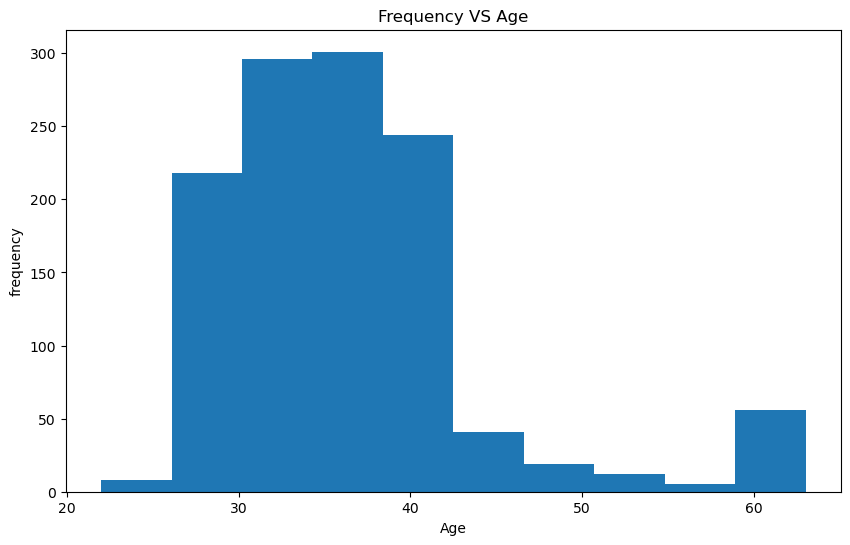

In [22]:
# Create histograms for numeric variables
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Frequency VS Age')
plt.show()

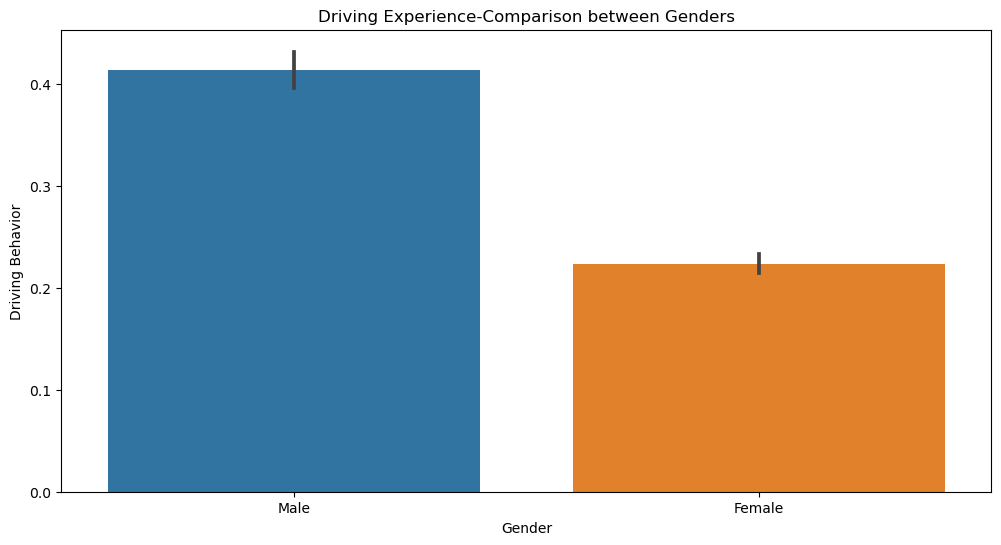

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Years of Driving Experience', data=df)
plt.xlabel('Gender')
plt.ylabel('Driving Behavior')
plt.title('Driving Experience-Comparison between Genders')
plt.show()

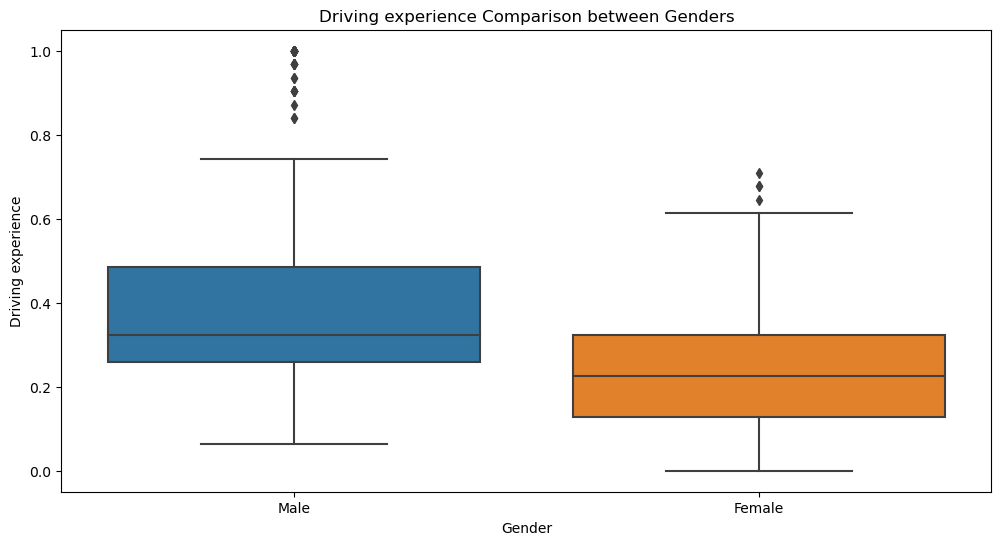

In [24]:
# Create box plots to compare driving behaviors between genders
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Years of Driving Experience', data=df)
plt.xlabel('Gender')
plt.ylabel('Driving experience')
plt.title('Driving experience Comparison between Genders')
plt.show()

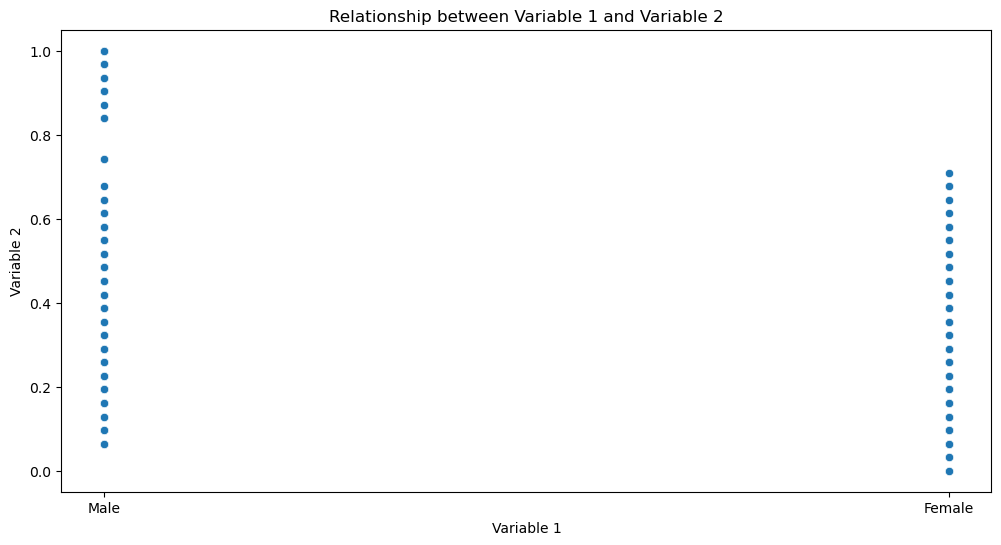

In [25]:
# Create scatter plot to explore the relationship between two variables
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Gender', y='Years of Driving Experience', data=df)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Relationship between Variable 1 and Variable 2')
plt.show()

### Statistical Tests

In [26]:
# Perform independent samples t-test
t_statistic, p_value = ttest_ind(df[df['Gender'] == 'Male']['Average Speed'],
                                 df[df['Gender'] == 'Female']['Average Speed'],
                                 equal_var=False)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -0.8697939346553197
p-value: 0.3845883625986757


In [27]:
# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(df['Years of Driving Experience'], df['Gender'])

# Perform chi-square test
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)


Chi-square statistic: 539.4795154833507
p-value: 2.1380163596770716e-95


## Training --- Testing

In [28]:
# Identify non-numeric columns
non_numeric_columns = ['Name', 'Gender', 'Location', 'Occupation', 'Marital Status', 'Socioeconomic Status', "Driver's License", 
                       'Accident Type', 'Accident Location', 'Date', 'Time', 'Weather Conditions', 'Road Conditions', 
                       'Accident Severity', 'Distracted Driving Frequency', 'Training Programs', 'Certifications', 
                       'Vehicle Type', 'Vehicle Make', 'Vehicle Model', 'Road Type', 'Speed Limit', 'Traffic Signs Present', 
                       'Road Conditions.1', 'Seatbelt Usage']


In [29]:
# Perform one-hot encoding on non-numeric columns
df_encoded = pd.get_dummies(df, columns=non_numeric_columns)

In [30]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('Distance Traveled (km)', axis=1)
y = df_encoded['Average Speed']

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (960, 1076) (960,)
Testing set shape: (240, 1076) (240,)


In [33]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Predict on the testing set
y_pred = model.predict(X_test)

### Model Accuracy

In [35]:
# Evaluate the model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8583333333333333


In [36]:
# Generate classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

          50       0.00      0.00      0.00        12
          55       0.88      1.00      0.94       166
          60       0.80      0.74      0.77        38
          65       1.00      0.44      0.62         9
          70       0.62      0.57      0.59        14
          75       0.00      0.00      0.00         1

    accuracy                           0.86       240
   macro avg       0.55      0.46      0.49       240
weighted avg       0.81      0.86      0.83       240



### Conclusion:

**Are Females Really bad at Driving?**

No, the belief that females are inherently bad at driving is a stereotype and a misconception. Driving abilities are not determined by gender, but rather by individual skills, knowledge, experience, and responsible behavior.

Research studies have consistently shown that there is no significant difference in driving abilities between genders. Factors such as training, experience, adherence to traffic rules, and individual driving habits have a more significant impact on driving skills and safety than gender alone.

It's important to recognize that generalizing an entire gender based on anecdotal experiences or stereotypes is unfair and can perpetuate bias and discrimination. Each individual's driving abilities should be evaluated on their own merits, irrespective of their gender.

Promoting safe driving practices, providing equal opportunities for driver education and training, and encouraging responsible behaviour on the road are more effective ways to improve overall road safety, regardless of gender. It's essential to challenge and debunk stereotypes that perpetuate gender-based misconceptions and promote a fair and inclusive environment for all drivers.


**Why do most people have this misconception?**

The misconception that females are bad at driving may stem from various factors, including societal norms, cultural beliefs, personal biases, and limited exposure to diverse experiences. Here are some reasons why this misconception may exist:

1. **Gender stereotypes:** Society has long perpetuated gender stereotypes, assigning certain traits or behaviours to specific genders. These stereotypes can create biases and assumptions about abilities, including driving skills. The belief that men are better drivers and women are worse drivers can be a result of these deeply ingrained stereotypes.

2. **Confirmation bias:** Confirmation bias is the tendency to seek or interpret information in a way that confirms pre-existing beliefs. If someone already believes that women are bad drivers, they may selectively remember or notice instances where they witnessed female drivers making mistakes or exhibiting poor driving behavior, while ignoring instances that contradict their belief.

3. **Media influence:** Media portrayals can reinforce gender stereotypes, including those related to driving abilities. Movies, TV shows, advertisements, and other forms of media often depict male characters as skilled and confident drivers, while portraying female characters as more prone to accidents or mistakes behind the wheel. These representations can influence people's perceptions and contribute to the misconception.

4. **Limited exposure**: Limited personal experiences or exposure to diverse drivers can contribute to the perpetuation of this misconception. If someone has had limited interactions with female drivers or has had negative experiences with a few female drivers, they may generalize those experiences to all female drivers without considering the larger context.

5. **Historical biases**: Historically, driving and transportation-related professions have been male-dominated. This may have led to a biased perception that men are more skilled or experienced drivers. As gender roles and societal dynamics evolve, it is important to challenge these historical biases and recognize that driving abilities are not determined by gender.

It is crucial to address and challenge these misconceptions by promoting accurate information, educating individuals about the diverse abilities of drivers across genders, and emphasizing the importance of evaluating driving skills based on individual merits rather than gender stereotypes.

**Explain the importance of addressing the misconception about female driving abilities**

Addressing the misconception about female driving abilities is important for several reasons:

1. **Promoting gender equality:** The misconception about female driving abilities perpetuates gender stereotypes and biases. By challenging this misconception, we can promote gender equality and create a more inclusive society where individuals are treated fairly and without discrimination.

2. **Eliminating gender-based discrimination:** If the misconception about female driving abilities persists, it can lead to discriminatory practices such as higher insurance premiums or biased hiring decisions in certain industries. By debunking this misconception, we can work towards eliminating gender-based discrimination in various aspects of life, including driving.

3. **Improving road safety:** The focus on addressing the misconception about female driving abilities is not about proving superiority or inferiority of one gender over the other. It is about acknowledging that safe driving is not dependent on gender but on individual skills, knowledge, and responsible behavior. By dispelling this misconception, we can shift the focus towards improving road safety for all individuals, regardless of their gender.

4. **Encouraging female empowerment:** Challenging the misconception about female driving abilities can empower women and encourage their active participation in various fields, including traditionally male-dominated areas such as transportation, logistics, and driving professions. It can contribute to breaking down gender barriers and fostering gender diversity and inclusivity.

5. **Enhancing social perceptions:** Addressing the misconception about female driving abilities can help reshape societal perceptions and attitudes towards women. It can challenge and change deeply ingrained stereotypes, leading to a more progressive and equitable society.

Overall, addressing the misconception about female driving abilities is crucial for promoting gender equality, eliminating discrimination, improving road safety, empowering women, and fostering positive social change. It is an important step towards creating a society where individuals are valued and treated based on their abilities, rather than preconceived notions based on gender.


### References:

http://www.kaggle.com/competitions/kaggle-survey-2020

https://r.search.yahoo.com/_ylt=AwrIe5n8uaFki5MpxhYM34lQ;_ylu=Y29sbwNpcjIEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1688349309/RO=10/RU=https%3a%2f%2ftowardsdatascience.com%2fdata-analysis-and-visualization-with-jupyter-notebook-22f6dcd25cc5/RK=2/RS=QbFAGeNMloYJfy.zSVaK7n9KuPs-

https://r.search.yahoo.com/_ylt=AwrIe5n8uaFki5MpyBYM34lQ;_ylu=Y29sbwNpcjIEcG9zAzIEdnRpZAMEc2VjA3Ny/RV=2/RE=1688349309/RO=10/RU=https%3a%2f%2fgithub.com%2fdalejn%2fcleanBib/RK=2/RS=IzoXp17MAgc.os5GDjyXELh.8CA-

https://r.search.yahoo.com/_ylt=AwrIe5n8uaFki5Mp1BYM34lQ;_ylu=Y29sbwNpcjIEcG9zAzMEdnRpZAMEc2VjA3Ny/RV=2/RE=1688349309/RO=10/RU=https%3a%2f%2fgetrevising.co.uk%2fdiagrams%2fgender-dysphoria/RK=2/RS=Wrf4eIx8V2GRXYzNNUUZJLJIIVk-